I am using this to test out the downsampling code
and document how to use the montage viewing.
-Chris
2018-05-07

In [1]:
%matplotlib inline

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,9)

In [3]:
import eegvis
import eegvis.stackplot_bokeh as sbplot
import eegvis.stacklineplot as splot
import eegvis.montageview

In [4]:
import eeghdf


In [5]:
ls

__pycache__/      Untitled.ipynb      vizSpasm.ipynb
stacklineplot.py  vizAbsenceSz.ipynb


In [6]:
ls ../data

absence_epilepsy.eeghdf*   tuh_00000115_s07_a00_f200.eeg.h5
spasms.eeghdf*             tuh_00000115_s07_a01.edf*
tuh_00000115_s07_a00.edf*  tuh_00000115_s07_a02.edf*


In [7]:
testfile = '../data/tuh_00000115_s07_a00_f200.eeg.h5'
# hf = h5py.File(testfile, 'r')
eegf = eeghdf.Eeghdf_ver2(testfile)
hf = eegf.hdf

In [8]:
list(hf.keys())

['frecord200Hz', 'patient', 'record-0']

In [9]:
frec = hf['frecord200Hz']

In [10]:
dict(frec.items())

{'phys_signals': <HDF5 dataset "phys_signals": shape (30, 59999), type "<f4">}

In [11]:
phys_signals = frec['phys_signals']

In [12]:
elabels = eegf.electrode_labels

In [13]:
phys_signals

<HDF5 dataset "phys_signals": shape (30, 59999), type "<f4">

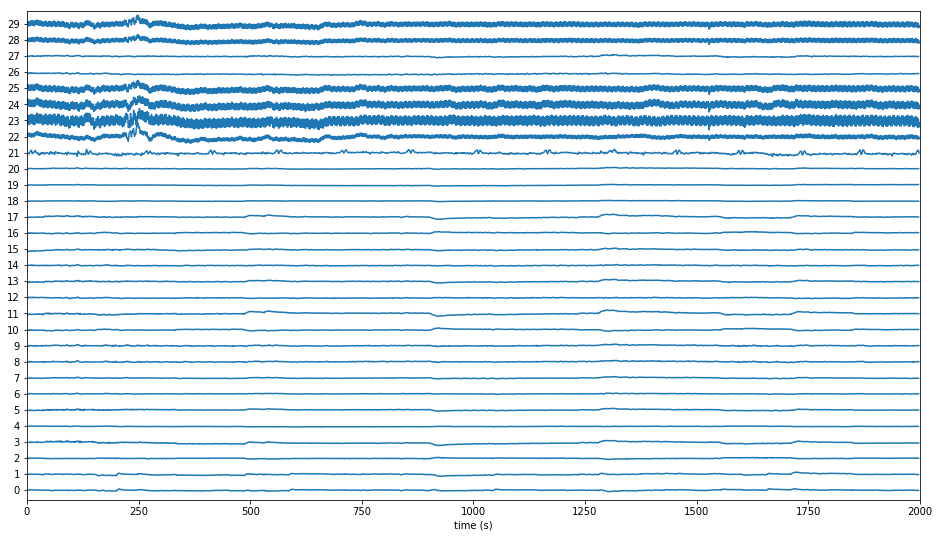

In [14]:
splot.stackplot(phys_signals[:,0:2000])

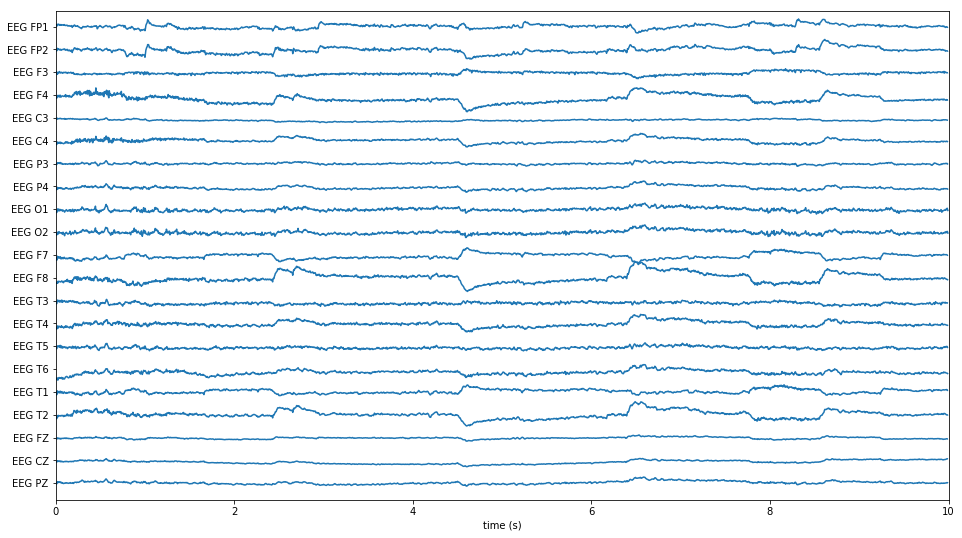

In [15]:
splot.show_epoch_centered(phys_signals, goto_sec=5, epoch_width_sec=10, chstart=0, chstop=21, fs=200, ylabels=elabels)

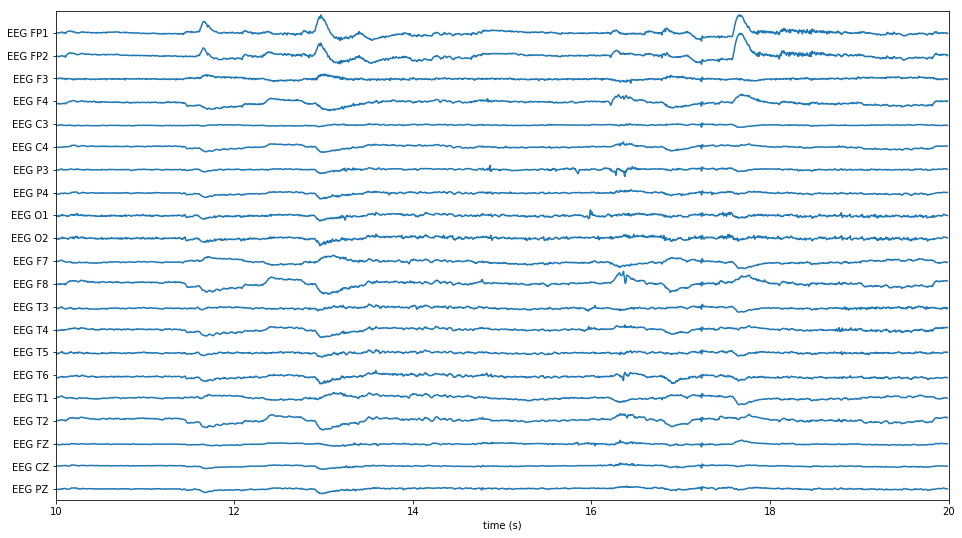

In [16]:
splot.show_epoch_centered(phys_signals, goto_sec=15, epoch_width_sec=10, chstart=0, chstop=21, fs=200, ylabels=elabels)

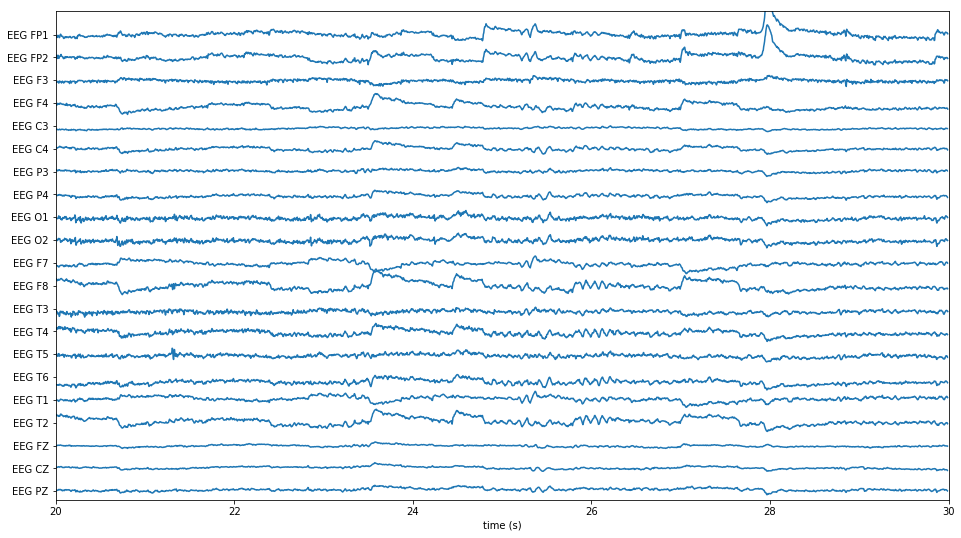

In [17]:
splot.show_epoch_centered(phys_signals, goto_sec=25, epoch_width_sec=10, chstart=0, chstop=21, fs=200, ylabels=elabels, yscale=1.5)

In [18]:
eegvis.montageview.DB_LABELS

['Fp1-F7',
 'F7-T3',
 'T3-T5',
 'T5-O1',
 'Fp2-F8',
 'F8-T4',
 'T4-T6',
 'T6-O2',
 'Fp1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'Fp2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'Fz-Cz',
 'Cz-Pz']

In [19]:
elabels

['EEG FP1',
 'EEG FP2',
 'EEG F3',
 'EEG F4',
 'EEG C3',
 'EEG C4',
 'EEG P3',
 'EEG P4',
 'EEG O1',
 'EEG O2',
 'EEG F7',
 'EEG F8',
 'EEG T3',
 'EEG T4',
 'EEG T5',
 'EEG T6',
 'EEG T1',
 'EEG T2',
 'EEG FZ',
 'EEG CZ',
 'EEG PZ',
 'EEG EKG1',
 'EEG C3P',
 'EEG C4P',
 'EEG SP1',
 'EEG SP2',
 'EEG A1',
 'EEG A2',
 'EEG 31',
 'EEG 32']

In [20]:
rlabels = eegvis.montageview.standard2shortname(elabels)
rlabels

['FP1',
 'FP2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'T1',
 'T2',
 'FZ',
 'CZ',
 'PZ',
 'EKG1',
 'C3P',
 'C4P',
 'SP1',
 'SP2',
 'A1',
 'A2',
 '31',
 '32']

In [21]:
# make standard, wonder if I should make all uppercase?
# FP1 -> Fp1, FP2 -> Fp2, CZ -> Cz necessary to for double banana
replacement_dict = {
    'FP1':'Fp1',
    'FP2':'Fp2',
    'CZ' : 'Cz',
    'PZ' : 'Pz',
    'FZ' : 'Fz'
}
rlabels = [eegvis.montageview.replace_all(text, replacement_dict) for text in rlabels]


In [22]:
monv = eegvis.montageview.MontageView(eegvis.montageview.DB_LABELS, rlabels)

In [23]:
V = eegvis.montageview.double_banana_set_matrix(monv.V)

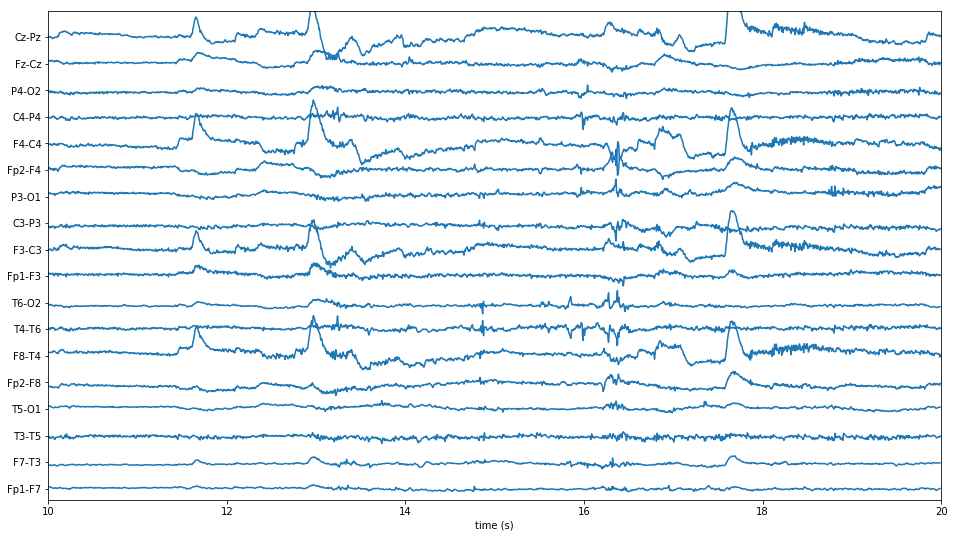

In [25]:
splot.show_montage_centered(phys_signals, monv,15,
                        epoch_width_sec=10,
                        chstart=0, chstop=21, fs=200,
                        ylabels=elabels,yscale=2.0) 

In [26]:
# now reverse for clinical use
monv.V = - monv.V

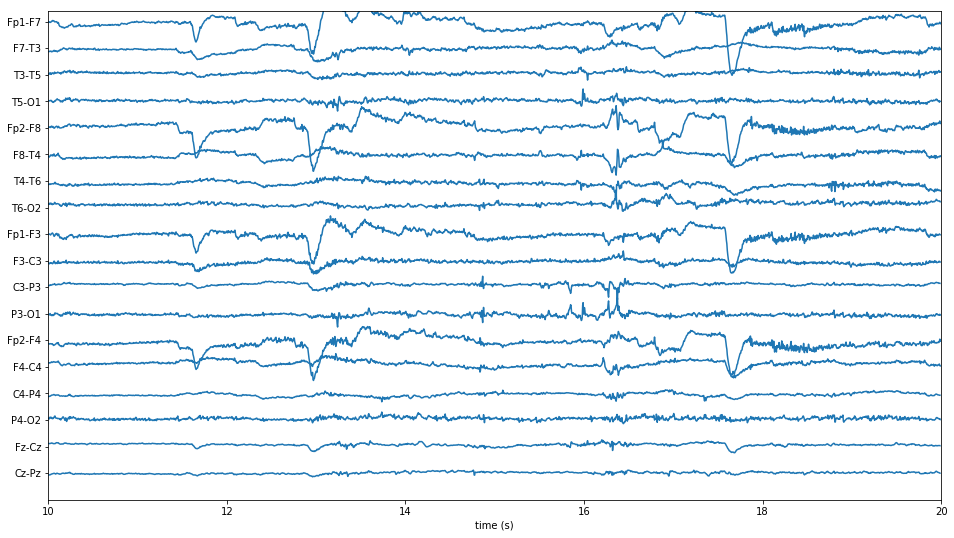

In [32]:
splot.show_montage_centered(phys_signals, monv,15,
                        epoch_width_sec=10,
                        chstart=0, chstop=21, fs=200,
                        ylabels=rlabels,yscale=2.0) 

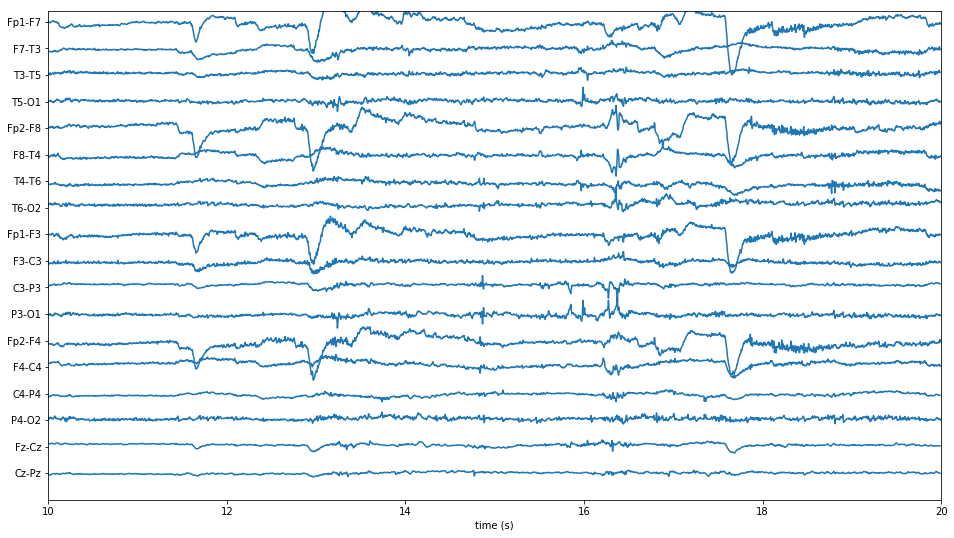

In [34]:
# now let's compare with the original waveform
signals = eegf.rawsignals
splot.show_montage_centered(signals, monv,15,
                        epoch_width_sec=10,
                        chstart=0, chstop=21, fs=eegf.sample_frequency,
                        ylabels=rlabels,yscale=2.0) 

Ok. That looks pretty good
- next need to clean up montage viewing code
- run across all all tuh seizure versions